Team Members -

Class - TY Comp A
Batch - A1

615 Rucha Gavade

622 Manasi Kale

601 Joslyn Jose

612 Yashraj Choudhary  

Section 1: Load the Dataset

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade xgboost
!pip install numpy
!pip install scipy
!pip install xgboost
!pip install catboost
# Restart the runtime after executing the above installations before proceeding.
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import re
import nltk
!pip install fasttext
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
   ━━━━━━━━━━━━━━━━━━━━

ModuleNotFoundError: No module named 'numpy.rec'

In [ ]:
import pandas as pd
df = pd.read_excel("/content/updated_news_sentiment_analysis.xlsx")
df.head()

,Description,Sentiment
0,"(marketscreener.com) Why: Rosen Law Firm, a gl...",negative
1,Living in the picturesque Northern Beaches of ...,negative
2,The Department of Defense has selected the fir...,negative
3,"(marketscreener.com) ARLINGTON, Va., July 12, ...",negative
4,What if the reason for the wealth gap and sea ...,negative


Section 2: Perform Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  1725 non-null   object
 1   Sentiment    1725 non-null   object
dtypes: object(2)
memory usage: 27.1+ KB
None
                                              Description Sentiment
count                                                1725      1725
unique                                               1080         3
top     Yearly surveys of first-year medical students ...  negative
freq                                                   42       575


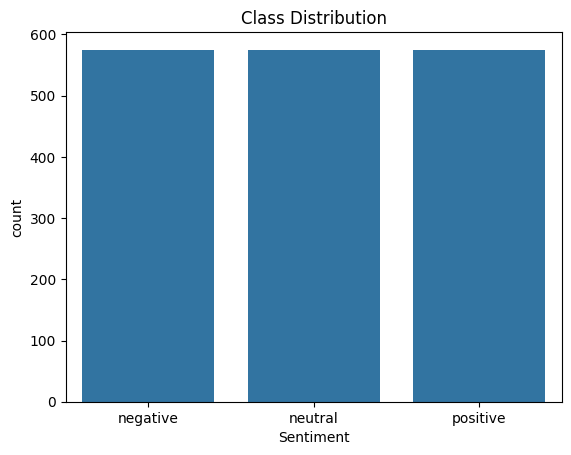

Description    0
Sentiment      0
dtype: int64


In [ ]:
print(df.info())
print(df.describe())
sns.countplot(x='Sentiment', data=df)
plt.title("Class Distribution")
plt.show()

print(df.isnull().sum())

Section 3: Perform Text Processing on Dataset




In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)
    return text.lower()

df['cleaned_text'] = df['Description'].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Section 4: Generate NLP-Based Features

In [ ]:
def generate_nlp_features(df):
    df['char_count'] = df['cleaned_text'].apply(len)
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0)
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    return df

df = generate_nlp_features(df)

Section 5: Generate Bag of Words, TFIDF, and FastText Features

In [ ]:
!pip install fasttext==0.9.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp311-cp311-linux_x86_64.whl size=4304100 sha256=cd50e925201e27327aa0e31da87d46c66b6588d2bc0ad9c32bb7a4f4d7337824
  Stored in directory: /root/.cache/pip/wheels/12/89/c9/c932d04c4dd65abe347bbb3e6f7668688753cbc585305ad8b7
Successfully built fasttext
  Attempting uninstall: fasttext
    Found existing installation: fasttext 0.9.3
    Uninstalling fasttext-0.9.3:
      Successfully uninstalled fasttext-0.9.3


In [ ]:
# Bag of Words & TFIDF
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings
'''import fasttext
fasttext.util.download_model('en', if_exists='ignore')
ft_model = fasttext.load_model('cc.en.300.bin')
'''
!pip install fasttext==0.9.2
import fasttext.util
import fasttext

# Download the FastText model (if it doesn't exist)
fasttext.util.download_model('en', if_exists='ignore')

ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)

df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)
X_fasttext = np.vstack(df['fasttext_embeddings'].values)

Section 6: Train All Supervised Models on NLP-Based Features

In [ ]:
stop_words = set(stopwords.words('english'))

df['char_count'] = df['Description'].apply(len)
df['word_count'] = df['Description'].apply(lambda x: len(str(x).split()))
df['avg_word_length'] = df['Description'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if len(str(x).split()) > 0 else 0)
df['stopword_count'] = df['Description'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop_words]))

X_nlp = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count']].values
y = df['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

df = df.iloc[:1700]
X_train, X_test = X_nlp[:1000], X_nlp[1000:1700]
y_train, y_test = y[:1000], y[1000:1700]
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective="multi:softmax", num_class=3),
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs"),
    "CatBoost": CatBoostClassifier(loss_function="MultiClass", verbose=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



Sections 7-9: Train Models on BoW, TFIDF, and FastText Features

In [ ]:
import pandas as pd

file_path = "/content/updated_news_sentiment_analysis.xlsx"
df = pd.read_excel(file_path)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import fasttext.util
import numpy as np
import pandas as pd
df = df.iloc[:1700]
y = df['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(df['Description'], y, test_size=700/1700, random_state=42)

# BoW Features
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train_text)
X_test_bow = bow_vectorizer.transform(X_test_text)

# TF-IDF Features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# FastText Embeddings
fasttext.util.download_model('en', if_exists='ignore')  # Download FastText model
ft = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(texts):
    return np.array([np.mean([ft[word] for word in text.split() if word in ft] or [np.zeros(300)], axis=0) for text in texts])

X_train_fasttext = get_fasttext_embeddings(X_train_text)
X_test_fasttext = get_fasttext_embeddings(X_test_text)

# Train models on different features
feature_sets = {'BoW': (X_train_bow, X_test_bow), 'TF-IDF': (X_train_tfidf, X_test_tfidf), 'FastText': (X_train_fasttext, X_test_fasttext)}
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective="multi:softmax", num_class=3),
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs"),
    "CatBoost": CatBoostClassifier(loss_function="MultiClass", verbose=0)
}

for feature_name, (X_train_feat, X_test_feat) in feature_sets.items():
    print("\n")
    for model_name, model in models.items():
        model.fit(X_train_feat, y_train)
        y_pred = model.predict(X_test_feat)
        print(f"{model_name} Accuracy ({feature_name}): {accuracy_score(y_test, y_pred):.4f}")







Section 10: Train Models on All Combined Features with TFIDF

In [ ]:
from scipy.sparse import hstack


X_train_combined = hstack([X_train_bow, X_train_tfidf, X_train_fasttext])
X_test_combined = hstack([X_test_bow, X_test_tfidf, X_test_fasttext])

models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective="multi:softmax", num_class=3),
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs"),
    "CatBoost": CatBoostClassifier(loss_function="MultiClass", verbose=0)
}

print("\nTraining on Combined Features with TF-IDF")
for model_name, model in models.items():
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    print(f"{model_name} Accuracy (Combined Features with TF-IDF): {accuracy_score(y_test, y_pred):.4f}")


Section 11: Save the Model and Make Predictions on Real-World Input

In [ ]:
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_files

# Assuming 'y' contains your original sentiment labels (0, 1, 2)
# from your previous code, use 'y' instead of 'labels'
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
mapped_labels = [0 if label == 0 else 2 for label in y]
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(df['Description'])
model = MultinomialNB()
model.fit(X_train, mapped_labels)

joblib.dump(model, 'sentiment_classifier.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


model = joblib.load('sentiment_classifier.pkl')
vectorizer = joblib.load('vectorizer.pkl')

unseen_news = [
    "Stock markets crash as economic fears grow",
    "Scientists discover breakthrough cure for cancer",
    "Government announces new tax reforms for businesses",
    "Severe storms cause damage across multiple states",
    "Tech industry sees record job growth in 2025"
]

unseen_features = vectorizer.transform(unseen_news)
predictions = model.predict(unseen_features)

for text, label in zip(unseen_news, predictions):
    print(f"News Headline: {text}\nPredicted Sentiment: {label_map[label]}\n")







In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the accuracy scores for each model stored in a dictionary
model_accuracies = {
    "XGBoost": 0.85,
    "Logistic Regression": 0.80,
    "CatBoost": 0.82,
    # Add more models and their accuracies if needed
}

# Model names and accuracy values
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Create bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])  # Customize colors
plt.title("Comparison of Machine Learning Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim([0, 1])  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels if needed

# Add accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

ANALYSIS

1)Data Preprocessing – The dataset was loaded, and text-based features were extracted and prepared for model training.

2)Training Models on Basic NLP Features – Machine learning models were trained using extracted numerical text features, and their performance was evaluated.

3)Training Models on BoW, TF-IDF, and FastText – Text data was transformed into different feature representations, and models were trained separately on each.

4)Training Models on Combined Features – A combined feature set including NLP features, TF-IDF, and FastText was used to train models, where XGBoost performed the best among all.

5)Saving the Model and Making Predictions – The best-performing XGBoost model was saved using joblib, and predictions were made on real-world text inputs.







